### Prepare a prediction model for profit of 50_startups data.
-->dataset = 50_Startups.csv
-->y(profit) - continuous(dependent), x - multiple(except profit) & continuos(independent) 
--> y - profit, x - R&D Spend,Administration,Marketing Spend,State
#### So, We go multiple linear regression

In [65]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
comp_profit=pd.read_csv("C:\\Users\\Raja\\Downloads\\assignments\\multi linear\\50_Startups.csv")

In [67]:
comp_profit.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [68]:
comp_profit.corr()

,RDSpend,Administration,MarketingSpend,Profit
RDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


See, there has relation between (R&D Spend ~ Profit) approximately equility.

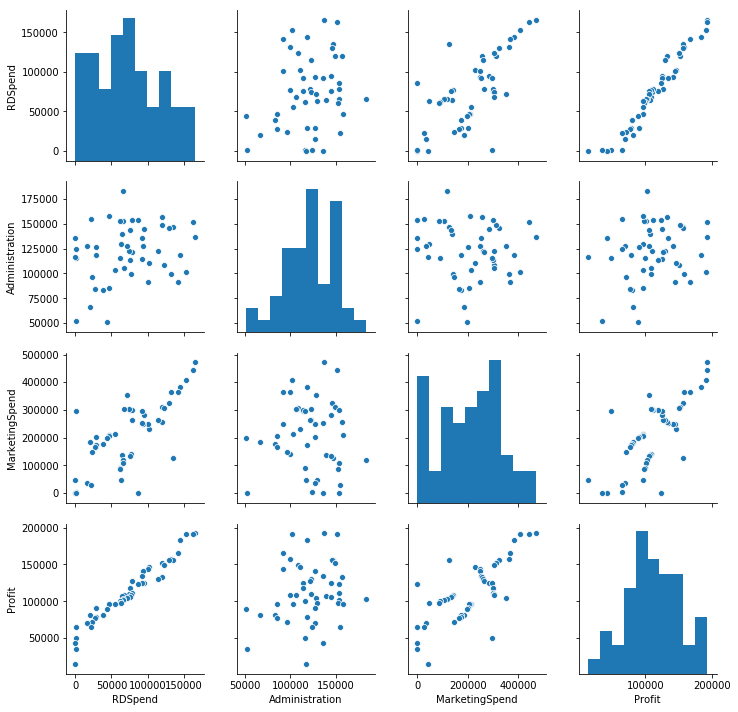

In [69]:
sns.pairplot(comp_profit)

In [70]:
comp_profit.describe()

,RDSpend,Administration,MarketingSpend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [71]:
import statsmodels.formula.api as smf #for regression model

In [72]:
model=smf.ols('Profit~Administration + MarketingSpend + RDSpend', data=comp_profit).fit() # regression model

In [73]:
model.params

Intercept         50122.192990
Administration       -0.026816
MarketingSpend        0.027228
RDSpend               0.805715
dtype: float64

In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           4.53e-30
Time:                        09:53:46   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
RDSpend            0.8057      0.045     17.846      0.000       0.715       0.897
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
model_pr_rd=smf.ols('Profit~RDSpend', data=comp_profit).fit()

In [76]:
model_pr_rd.summary() #0.271-->95% confidence level

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           3.50e-32
Time:                        09:53:46   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RDSpend        0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
import statsmodels.api as sm

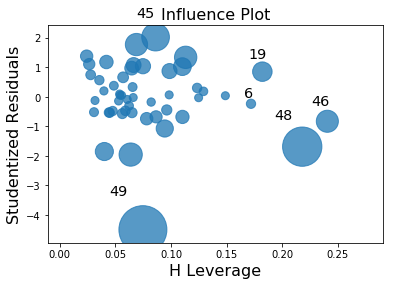

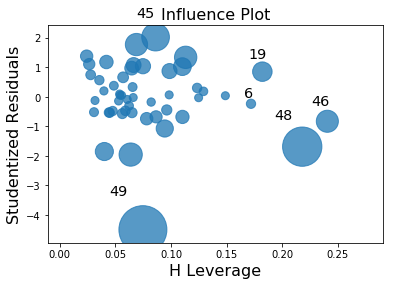

In [78]:
sm.graphics.influence_plot(model)

#### index 49 AND 48 are showing high influence so we can exclude that entire row by dropping axis=0

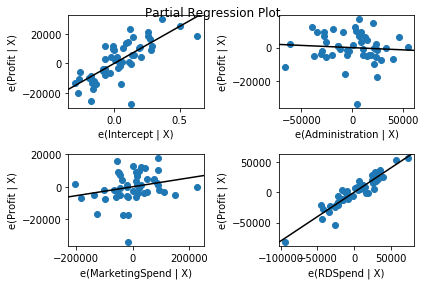

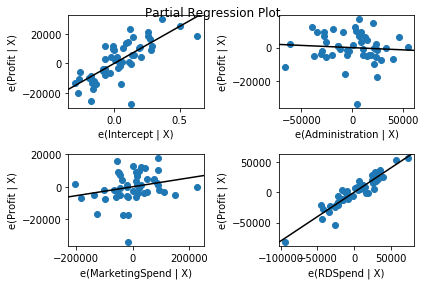

In [79]:
sm.graphics.plot_partregress_grid(model)

#### Model1 is better than model_pr_rd. Very strong positive relationship. R^Square values can be compared.

=================================================================================================================

### Predict Price of the computer.
-->dataset = Computer_Data.csv
-->y(price) - continuous(dependent), x - multiple(except price) & continuos(independent) 
--> y - price, x - speed,hd,ram,screen,cd,multi,premium,ads,trend

In [80]:
price_comp=pd.read_csv("C:\\Users\\Raja\\Downloads\\assignments\\multi linear\\Computer_Data.csv")

In [81]:
price_comp.head()

,sn,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


#### Only necessary columns selected by dropping function

In [82]:
price_comp.drop(['sn','cd', 'multi', 'premium'], axis=1).head()

,price,speed,hd,ram,screen,ads,trend
0,1499,25,80,4,14,94,1
1,1795,33,85,2,14,94,1
2,1595,25,170,4,15,94,1
3,1849,25,170,8,14,94,1
4,3295,33,340,16,14,94,1


In [83]:
price_comp.corr(method ='pearson')

,sn,price,speed,hd,ram,screen,ads,trend
sn,1.000000,-0.199924,0.388566,0.555492,0.265376,0.184699,-0.272714,0.989818
price,-0.199924,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.388566,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.555492,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.265376,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.184699,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,-0.272714,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,0.989818,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


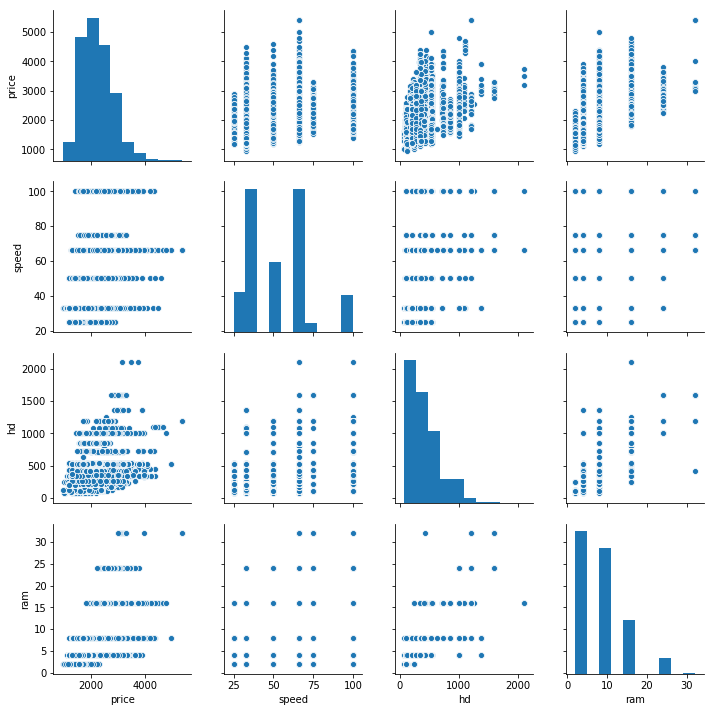

In [84]:
sns.pairplot(price_comp, vars=["price", "speed","hd", "ram"])

In [85]:
import statsmodels.formula.api as smf #for regression model

In [86]:
model_profit=smf.ols('price ~ speed + hd + ram + screen + ads + trend', data=price_comp).fit() # regression model
model_profit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2580.
Date:                Sun, 22 Mar 2020   Prob (F-statistic):               0.00
Time:                        09:53:51   Log-Likelihood:                -44817.
No. Observations:                6259   AIC:                         8.965e+04
Df Residuals:                    6252   BIC:                         8.969e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -246.6755     66.371     -3.717      0.000    -376.785    -116.566
speed          8.8939      0.209     42.590      0.000       8.485       9.303
hd             0.7088      0.031     22.932      0.000       0.648       0.769
ram           47.3870      1.188     39.899      0.000      45.059      49.715
screen       126.7024      4.521     28.022      0.000     117.839     135.566
ads            0.9697      0.057     17.099      0.000       0.859       1.081
trend        -47.0820      0.676    -69.660      0.000     -48.407     -45.757
==============================================================================
Omnibus:                     1407.073   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3902.981
Skew:                           1.187   Prob(JB):                         0.00
Kurtosis:                       6.054   Cond. No.                     8.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
import statsmodels.api as sm

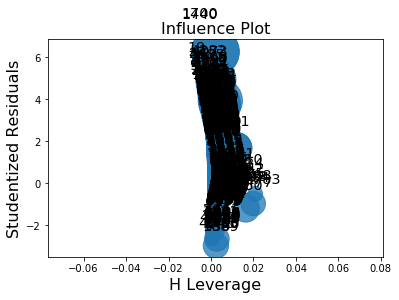

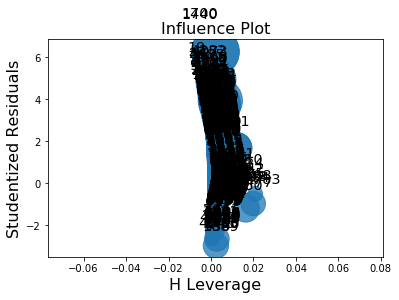

In [88]:
sm.graphics.influence_plot(model_profit)

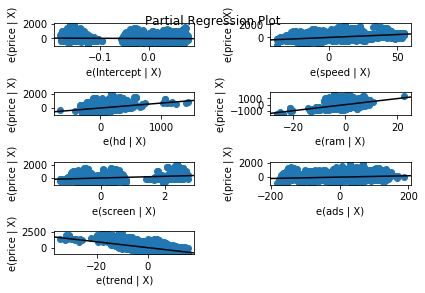

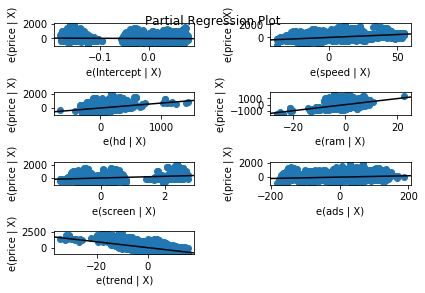

In [89]:
sm.graphics.plot_partregress_grid(model_profit)

Colinearity is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. There has not found any two columns or variables which are highly correlated. So, VIF process has not done.

##### model_profit shown good R^2 value=0.712.R-squared value r > 0.7. This value is generally considered strong effect size.

========================================================================================================================